In [1]:
from SpinTrain import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define the nine members of the ring

h = []
v = []
n = []

h_up = []
h_dn = []

for i in range(6):
    h.append(    Operator('h%d'%i,  'S^z_{h%d}'%i))
    h_up.append( Operator('h⁺%d'%i, 'S^+_{h%d}'%i))
    h_dn.append( Operator('h⁻%d'%i, 'S^-_{h%d}'%i))
    v.append(    Operator('v%d'%i,  'S^z_{v%d}'%i))
    n.append(    Operator('n%d'%i,  'S^z_{n%d}'%i))

# construct the commutator algebra
ca = CommutatorAlgebra()

def define_spinalg(plus, minus, z):
    ca.set_commutator(plus, minus)(2*z)
    ca.set_commutator(z, plus)( plus )
    ca.set_commutator(z, minus)( -1*minus )
    
for i in range(6):
    define_spinalg(h_up[i], h_dn[i], h[i])
    ca.add_operator(v[i])#these commute
    ca.add_operator(n[i])#these commute

In [3]:
# construct the zeta_i symbols   
bond_zetas = [Operator('ζ%d'%i,r'\zeta_%d'%i,scalar=True) for i in range(3)]
bond_zetas_bar = [Operator('ζb%d'%i,r'\zeta_%d^*'%i,scalar=True) for i in range(3)]

KA = Operator('KA','K_A',scalar=True)
KB = Operator('KB','K_B',scalar=True)

def conjugate_zetas(x):
    repl = []
    for i in range(3):
        repl.append((bond_zetas[i], bond_zetas_bar[i]))
        repl.append((bond_zetas_bar[i], bond_zetas[i]))
    return x.replaceall(*repl)



def zeta(i):
    return bond_zetas[i%3]

# assigns A bonds to (h0h1), (h2h3), (h4h5) and constructs the Z expression
Z = [0,0,0,0,0,0]
for i in range(6):             
    w1 = zeta(i)*h[(i+1)%6] + zeta(i+1)*n[i%6] +  zeta(i+2)*v[i%6]
    w2 = zeta(i+2)*h[(i-1)%6] + zeta(i+1)*n[(i-1)%6] +  zeta(i)*v[(i-1)%6]
    
    if i %2 == 0:
        Z[i] = KA*w1+KB*w2
    else:
        Z[i] = KB*w1+KA*w2

(-3.290021650635094,
 0.8904546633369868,
 -2.2865820659909177,
 2.2865820659909177)

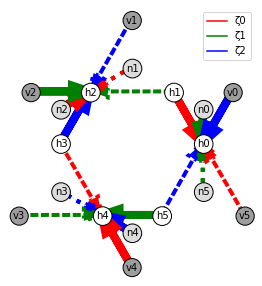

In [4]:
# Double check that the construction worked: plot it!

rB = 1.4
rA = 1

b1 = rB*np.array([1,0])
b2 = rB*np.array([1/2,np.sqrt(3)/2])

a1 = rA*np.array([1,0])
a2 = rA*np.array([1/2,np.sqrt(3)/2])

c1 = (2/3)*(a2-0.5*a1)
c2 = (2/3)*(a1-0.5*a2)

h_locs=np.array([np.array([0,0]), a2-a1, a2-a1-b1, -a1-b1, -a1-b2, -b2])
n_locs=np.array([c1*rA, a2-a1-c2*rB,c1*rA-a1-b1,-c1*rB-a1-b1,-b2-a1+c2*rA,-c1*rB])
v_locs=np.array([a2, -a1+a2+b2-b1, a2-2*a1-b1, -b2-a1-b1, -b2-a2,b1-b2])

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(*(h_locs.T),'ko')
ax.plot(*(n_locs.T),'ko')
ax.plot(*(v_locs.T),'ko')
ax.set_aspect('equal','box')

colors = {'ζ0': 'r', r'ζ1': 'g', r'ζ2': 'b'}
points = {'h': h_locs, 'v': v_locs, 'n': n_locs}

def arrow(f, i, **kwargs):
    dx = f-i
    ax.arrow(i[0],i[1],dx[0],dx[1],length_includes_head=True,head_width=0.2,**kwargs)

    
def plot_Z(i):
    for t in Z[i].terms:
        string = t.ops[-1].name
        node_type = string[0]
        num = int(string[1])
        linw = 0
        if t.ops[0].name == 'KA':
            linw = 8
            lins = '-'
        elif t.ops[0].name == 'KB':
            linw = 4
            lins = ':'
        arrow(h_locs[i],points[node_type][num],ls=lins,lw=linw,color=colors[t.ops[1].name])
    
# for i in range(6):
for i in [0,2,4]:
    plot_Z(i)
    assert len(Z[i].terms) == 6
    
# fig, ax = plt.subplots(figsize=(5,5))
# for i in [1,3,5]:
#     plot_Z(i)
#     assert len(Z[i].terms) == 6

# fig, ax = plt.subplots(figsize=(5,5))
# for i in [0,2,4]:
#     plot_Z(i)
#     assert len(Z[i].terms) == 6

dxy = np.array([-0.09,-0.07])   

boxdict = {'boxstyle':'Circle','facecolor':'white','edgecolor':'black'}

for i in range(6):
    ax.text(*(h_locs[i]+dxy),'h'+str(i), bbox={'boxstyle':'Circle','facecolor':'white','edgecolor':'black'})
    ax.text(*(n_locs[i]+dxy),'n'+str(i), bbox={'boxstyle':'Circle','facecolor':'#dddddd','edgecolor':'black'})
    ax.text(*(v_locs[i]+dxy),'v'+str(i), bbox={'boxstyle':'Circle','facecolor':'#9d9d9d','edgecolor':'black'})


for key in colors:
    plt.plot([], [], color=colors[key],label=key)
    
plt.legend()


    
# ax.set_xticks([])
# ax.set_yticks([])
# for s in ax.spines:
#     ax.spines[s].set_visible('False')
plt.axis('off')
    
# fig.savefig('./hexagon.pdf')

# Conclusion: No double counting, and conectivity is correct

In [5]:
# build a new commutator database for only the ladders and the Z's

cz = CommutatorAlgebra()


def calc_commutator(x1, x2):
    x = x1*x2 + x2 * x1 * -1
    x.move_scalars()
    for i in range(6):
        ca.move_right(x,h[i])
        ca.move_right(x,v[i])
        ca.move_right(x,n[i])
        
    for i in range(6):
        ca.move_right(x,h_up[i])
        ca.move_right(x,h_dn[i])
    x.collect()
    return x

for i in range(6):
    # self-consistency check
    assert(calc_commutator(h_up[i],h_dn[i]) == 2*h[i])
    assert(calc_commutator(h[i],h_up[i]) == h_up[i])
    assert(calc_commutator(h[i],h_dn[i]) == -1*h_dn[i])
#phew

# define the **symbolic** z's and zbars
Zs = [Operator('Zh%d'%i,'Z_{h%d}'%i) for i in range(6)]
Zs_bar = [Operator('Zhb%d'%i,'Z^*_{h%d}'%i) for i in range(6)]

for i in range(6):
    # define the original spin algebra, if needed
    cz.set_commutator(h_up[i], h_dn[i])(2*h[i])
    cz.set_commutator(h[i], h_up[i])(h_up[i])
    cz.set_commutator(h[i], h_dn[i])(-1*h_dn[i])
    for j in range(6):
        # re-express the knowledge in terms of symbol Zs
        cz.set_commutator(Zs[j], h_up[i])(calc_commutator(Z[j],h_up[i]))
        cz.set_commutator(Zs[j], h_dn[i])(calc_commutator(Z[j],h_dn[i]))
        
        cz.set_commutator(Zs_bar[j], h_up[i])(calc_commutator(conjugate_zetas(Z[j]),h_up[i]))
        cz.set_commutator(Zs_bar[j], h_dn[i])(calc_commutator(conjugate_zetas(Z[j]),h_dn[i]))
        
        
        assert calc_commutator(Z[i],h[i]) == 0
        assert calc_commutator(conjugate_zetas(Z[i]),h[i]) == 0
#         cz.set_commutator(Zs[i], h[i])(calc_commutator(Z[i],h[i]))


In [6]:
calc_commutator(Z[0],h_up[1]).show()
cz.get_commutator(Zs[0],h_up[1]).show()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
# Double check that the Z[i] are doing what they should

for i in range(6):
#     Z[i].show()
    zb = conjugate_zetas(Z[i])
    print(zb)
    print(conjugate_zetas(zb))
    assert conjugate_zetas(zb) == Z[i]

  +1 KA ζb0 h1  +1 KA ζb1 n0  +1 KA ζb2 v0  +1 KB ζb2 h5  +1 KB ζb1 n5  +1 KB ζb0 v5
  +1 KA ζ0 h1  +1 KA ζ1 n0  +1 KA ζ2 v0  +1 KB ζ2 h5  +1 KB ζ1 n5  +1 KB ζ0 v5
  +1 KB ζb1 h2  +1 KB ζb2 n1  +1 KB ζb0 v1  +1 KA ζb0 h0  +1 KA ζb2 n0  +1 KA ζb1 v0
  +1 KB ζ1 h2  +1 KB ζ2 n1  +1 KB ζ0 v1  +1 KA ζ0 h0  +1 KA ζ2 n0  +1 KA ζ1 v0
  +1 KA ζb2 h3  +1 KA ζb0 n2  +1 KA ζb1 v2  +1 KB ζb1 h1  +1 KB ζb0 n1  +1 KB ζb2 v1
  +1 KA ζ2 h3  +1 KA ζ0 n2  +1 KA ζ1 v2  +1 KB ζ1 h1  +1 KB ζ0 n1  +1 KB ζ2 v1
  +1 KB ζb0 h4  +1 KB ζb1 n3  +1 KB ζb2 v3  +1 KA ζb2 h2  +1 KA ζb1 n2  +1 KA ζb0 v2
  +1 KB ζ0 h4  +1 KB ζ1 n3  +1 KB ζ2 v3  +1 KA ζ2 h2  +1 KA ζ1 n2  +1 KA ζ0 v2
  +1 KA ζb1 h5  +1 KA ζb2 n4  +1 KA ζb0 v4  +1 KB ζb0 h3  +1 KB ζb2 n3  +1 KB ζb1 v3
  +1 KA ζ1 h5  +1 KA ζ2 n4  +1 KA ζ0 v4  +1 KB ζ0 h3  +1 KB ζ2 n3  +1 KB ζ1 v3
  +1 KB ζb2 h0  +1 KB ζb0 n5  +1 KB ζb1 v5  +1 KA ζb1 h4  +1 KA ζb0 n4  +1 KA ζb2 v4
  +1 KB ζ2 h0  +1 KB ζ0 n5  +1 KB ζ1 v5  +1 KA ζ1 h4  +1 KA ζ0 n4  +1 KA ζ2 v4


In [8]:
# Define the coefficients (see overleaf 'QSI axion semiclassics' for details)

U1AB = Operator('U1_AB', 'U_1(A,B)', scalar=True)
U2AB = Operator('U2_AB', 'U_2(A,B)', scalar=True)
U3AB = Operator('U3_AB', 'U_3(A,B)', scalar=True)
U1BA = Operator('U1_BA', 'U_1(B,A)', scalar=True)
U2BA = Operator('U2_BA', 'U_2(B,A)', scalar=True)
U3BA = Operator('U3_BA', 'U_3(B,A)', scalar=True)
U4 = Operator('U4', 'U_4', scalar=True)
U5 = Operator('U5', 'U_5', scalar=True)

JzA = Operator('JzA','J^z_A',scalar=True)
JzB = Operator('JzB','J^z_B',scalar=True)



JA = Operator('JA','J^\perp_A',scalar=True)
JB = Operator('JB','J^\perp_B',scalar=True)

ring_cw = []
ring_ccw = []
ring_direct = []

for i in range(6):
    e = h_up[(i+0)%6]*Zs[i%6]
    f = h_dn[(i+1)%6]*Zs_bar[(i+1)%6]
    E = h_up[(i+2)%6]*h_dn[(i+3)%6]
    F = h_up[(i+4)%6]*h_dn[(i+5)%6]
    
    if i%2 == 0:
        # E, F are A bonds
        x =  JA*JA*U1AB*(f*E*F*e + e*F*E*f)
        x += JA*JA*U2AB*(e*f*E*F + f*e*E*F + E*F*e*f + E*F*f*e)
        x += JA*JA*U3AB*(F*e*f*E + E*f*e*F)
    else:
        x =  JB*JB*U1BA*(f*E*F*e + e*F*E*f)
        x += JB*JB*U2BA*(e*f*E*F + f*e*E*F + E*F*e*f + E*F*f*e)
        x += JB*JB*U3BA*(F*e*f*E + E*f*e*F)
    
    
    ring_ccw.append(x)
    
    
for i in range(6):
    e = h_dn[(i+0)%6]*Zs_bar[i%6]
    f = h_up[(i+1)%6]*Zs[(i+1)%6]
    E = h_dn[(i+2)%6]*h_up[(i+3)%6]
    F = h_dn[(i+4)%6]*h_up[(i+5)%6]
    
    if i%2 == 0:
        # E, F are A bonds
        x =  JA*JA*U1AB*(f*E*F*e + e*F*E*f)
        x += JA*JA*U2AB*(e*f*E*F + f*e*E*F + E*F*e*f + E*F*f*e)
        x += JA*JA*U3AB*(F*e*f*E + E*f*e*F)
    else:
        x =  JB*JB*U1BA*(f*E*F*e + e*F*E*f)
        x += JB*JB*U2BA*(e*f*E*F + f*e*E*F + E*F*e*f + E*F*f*e)
        x += JB*JB*U3BA*(F*e*f*E + E*f*e*F)
    
    
    ring_cw.append(x)
    
for i in range(6):
    p = h_up[i%6]*Zs[i%6]
    m = h_dn[(i+3)%6]*Zs_bar[(i+3)%6]
    T = h_dn[(i+1)%6]*h_up[(i+2)%6]
    B = h_dn[(i-1)%6]*h_up[(i-2)%6]
    
    
    x = U4*(p*B*T*m + m*T*B*p)
    if i%2 == 0:
        x += U5*JzA*(p*T*m*B + m*T*p*B + B*m*T*p + B*p*T*m)
        x += U5*JzB*(p*B*m*T + m*B*p*T + T*m*B*p + T*p*B*m)
    else:
        x += U5*JzB*(p*T*m*B + m*T*p*B + B*m*T*p + B*p*T*m)
        x += U5*JzA*(p*B*m*T + m*B*p*T + T*m*B*p + T*p*B*m)
    x += U5*(JzA+JzB)*Fraction(1,2)*(p*m*B*T + T*B*m*p)
    x += U5*(JzA+JzB)*(T*p*m*B + B*m*p*T)
    
    x = JA*JB*x
    ring_direct.append(x)


In [9]:
scalar_order = [JA,JB,U1AB,U2AB,U3AB,U1BA,U2BA,U3BA,U4,U5,JzA,JzB,KA,KB]+bond_zetas + bond_zetas_bar

#ad hoc simplifier functions
# these impose a canonical order on all known symbols

def move_h_right(expr):

    for i in range(6):
        cz.move_right(expr, h_up[i])
        cz.move_right(expr, h_dn[i])
        
    expr.move_scalars()
    for s in reversed(scalar_order):
        cz.move_left(expr, s)
        
    expr.collect()
    
def move_h_left(expr):

    for i in range(6):
        cz.move_left(expr, h_dn[i])
        cz.move_left(expr, h_up[i])
        
    expr.move_scalars()
    for s in scalar_order:
        cz.move_right(expr, s)
        
    expr.collect()

        
    
    
    


In [10]:
odd_coeff = Expression()

for i in range(0,6,2):
    move_h_right(ring_cw[i])
    move_h_right(ring_ccw[i+1])
    move_h_right(ring_direct[i+1])

ring_O = ring_cw[0].factor()[1]
    
for i in range(0,6,2):
    f1, O1 = ring_cw[i].factor()
    f2, O2 = ring_ccw[i+1].factor()
    f3, O3 = ring_direct[i+1].factor()
    
    assert O1 == ring_O
    assert O2 == ring_O
    assert O3 == ring_O
    # can never be too careful!
    odd_coeff += f1
    odd_coeff += f2
    odd_coeff += f3


# odd_coeff.show()
print("Coefficient of ",ring_O,":")
print(odd_coeff)


Coefficient of  +1 h⁻0 h⁺1 h⁻2 h⁺3 h⁻4 h⁺5 :
  +1 JA JA U1_AB Zh1 Zhb0  +1 JA JA U1_AB Zhb0 Zh1  +2 JA JA U2_AB Zhb0 Zh1  +2 JA JA U2_AB Zh1 Zhb0  +1 JA JA U3_AB Zhb0 Zh1  +1 JA JA U3_AB Zh1 Zhb0  +1 JA JA U1_AB KA ζ0 Zhb0  +2 JA JA U2_AB KA ζ0 Zhb0  +1 JA JA U3_AB KA ζ0 Zhb0  -1 JA JA U1_AB KA ζb0 Zh1  -2 JA JA U2_AB KA ζb0 Zh1  -1 JA JA U3_AB KA ζb0 Zh1  +1 JA JA U1_AB KB ζ1 Zhb0  +2 JA JA U2_AB KB ζ1 Zhb0  +1 JA JA U3_AB KB ζ1 Zhb0  -1 JA JA U2_AB KA KB ζ1 ζb0  -1 JA JA U3_AB KA KB ζ1 ζb0  -1 JA JA U1_AB KB ζb2 Zh1  -2 JA JA U2_AB KB ζb2 Zh1  -1 JA JA U3_AB KB ζb2 Zh1  -1 JA JA U2_AB KA KB ζ0 ζb2  -1 JA JA U3_AB KA KB ζ0 ζb2  -2 JA JA U2_AB KB KB ζ1 ζb2  +1 JB JB U1_BA Zhb2 Zh1  +1 JB JB U1_BA Zh1 Zhb2  +2 JB JB U2_BA Zh1 Zhb2  +2 JB JB U2_BA Zhb2 Zh1  +1 JB JB U3_BA Zh1 Zhb2  +1 JB JB U3_BA Zhb2 Zh1  +1 JB JB U1_BA KA ζ0 Zhb2  +2 JB JB U2_BA KA ζ0 Zhb2  +1 JB JB U3_BA KA ζ0 Zhb2  -1 JB JB U1_BA KB ζb1 Zh1  -2 JB JB U2_BA KB ζb1 Zh1  -1 JB JB U3_BA KB ζb1 Zh1  -1 JB JB U2_BA KA KB ζ

In [11]:
even_coeff = Expression()

# we now move the h's *left* in order to prove that we capture everything we want in the coefficient of O

for i in range(1,6,2):
    move_h_left(ring_cw[i])
    move_h_left(ring_ccw[i-1])
    move_h_left(ring_direct[i-1])

ring_O_bar = ring_cw[1].factor('right')[0]
 
# f, b = ring_cw[1].factor('right')
# print(f)
# print(b)
    
for i in range(1,6,2):
    O1, f1 = ring_cw[i].factor('right')
    O2, f2 = ring_ccw[i-1].factor('right')
    O3, f3 = ring_direct[i-1].factor('right')

    # makes sure we are actually getting the right coefficients
    assert O1 == ring_O_bar
    assert O2 == ring_O_bar
    assert O3 == ring_O_bar

    even_coeff += f1
    even_coeff += f2
    even_coeff += f3


print("Coefficient of ",ring_O_bar,":")
# print(even_coeff)

Coefficient of  +1 h⁻5 h⁺4 h⁻3 h⁺2 h⁻1 h⁺0 :


In [12]:
# manual implemntation of complex conjugation
def conjugate_zeta_Z(expr):
    x = conjugate_zetas(expr)
    repl = []
    for i in range(6):
        repl.append((Zs[i], Zs_bar[i]))
        repl.append((Zs_bar[i], Zs[i]))
    return x.replaceall(*repl)
    
    
even_coeff_bar = conjugate_zeta_Z(even_coeff)
move_h_right(even_coeff_bar)

diff = even_coeff_bar + -1* odd_coeff
diff.collect()
assert diff == 0

# therefore odd_coeff = even_coeff_bar
# Hence We can halve the workload by exploiting hermiticity, and only worrying baout odd_coeff

In [13]:
# define the hexagon orientator

hexa = Operator('w','w',scalar=True)
hexa_bar = Operator('wb',r'w^*',scalar=True)

# Replaces symbolic Z with its full expression
def sub_for_Zs(expr):
    repl = []
    for i in range(6):
        repl.append((Zs[i],Z[i]))
        repl.append((Zs_bar[i],conjugate_zetas(Z[i])))
    return expr.replaceall(*repl)

# replaces zeta_i zeta_j^* -> w or w_bar depending on orientation
def simplify_zetas(expr):
    # only works if scalars are in canonical order
    simpl = []
    for i, z in enumerate(bond_zetas):
        for j, zb in enumerate(bond_zetas_bar):
            if i == j:
                simpl.append((z*zb, 1))
            elif i == (j+1) %3:
                simpl.append((z*zb, hexa))
            else:
                simpl.append((z*zb, hexa_bar))
    return expr.replaceall(*simpl).replaceall((hexa*hexa_bar, 1), (hexa_bar*hexa, 1))




odd_full = sub_for_Zs(odd_coeff)
move_h_right(odd_full)
simplified_odd = simplify_zetas(odd_full)
move_h_right(simplified_odd)
# print(simplified_odd)

In [14]:
# replace S^2 -> 1/4
def cancel_spinsquare(expr):
    repl = []
    for i in range(6):
        # spins square to 1/4
        repl.append((n[i]*n[i], Fraction(1,4)))
        repl.append((v[i]*v[i], Fraction(1,4)))
        repl.append((h[i]*h[i], Fraction(1,4)))
    x= expr.replaceall(*repl)
    x.collect()
    return x



repl = []
for i in range(6):
    # absorb S^z into the O operator
    if ring_O.ops[i] == h_up[i]:
        repl.append((h[i], Fraction(1,2)))
    elif ring_O.ops[i] == h_dn[i]:
        repl.append((h[i], Fraction(-1,2)))


# impose the ice condition
for i in range(6):
    repl.append((v[i], -1*n[i]))

replaced = simplified_odd.replaceall(*repl)

for i in range(6):
    ca.move_right(replaced, n[i])


replaced.collect()
    
absorbed_odd = cancel_spinsquare(replaced)
        
print(absorbed_odd)

# print(simplified_odd.coefficient(JA*JA*U1AB,'right').coefficient(n[0]*n[0]))

  +3 JA JA U1_AB KA KB w  +3/2 JA JA U1_AB KB KB wb  +4 JA JA U1_AB KA KB w n0 n1  -2 JA JA U1_AB KA KB n0 n1  +2 JA JA U1_AB KB KB w n1 n5  -4 JA JA U1_AB KB KB wb n1 n5  -2 JA JA U1_AB KA KB wb n0 n1  +2 JA JA U1_AB KB KB n1 n5  -3/2 JA JA U1_AB KA KA  +3/2 JA JA U1_AB KA KA w  +4 JA JA U1_AB KA KB w n0 n5  -2 JA JA U1_AB KA KB wb n0 n5  +3/2 JA JA U1_AB KA KA wb  -2 JA JA U1_AB KA KB n0 n5  -3 JA JA U2_AB KA KA  +8 JA JA U2_AB KA KB w n0 n1  -4 JA JA U2_AB KA KB wb n0 n1  +3 JA JA U2_AB KA KA w  -4 JA JA U2_AB KA KB n0 n1  +3 JA JA U2_AB KA KA wb  -3 JA JA U2_AB KB KB wb  +4 JA JA U2_AB KB KB w n1 n5  -8 JA JA U2_AB KB KB wb n1 n5  +8 JA JA U2_AB KA KB w n0 n5  -4 JA JA U2_AB KA KB n0 n5  +4 JA JA U2_AB KB KB n1 n5  -4 JA JA U2_AB KA KB wb n0 n5  -3 JA JA U3_AB KA KB w  -3/2 JA JA U3_AB KA KA  +4 JA JA U3_AB KA KB w n0 n1  -2 JA JA U3_AB KA KB wb n0 n1  +3/2 JA JA U3_AB KA KA w  -2 JA JA U3_AB KA KB n0 n1  +3/2 JA JA U3_AB KA KA wb  +3/2 JA JA U3_AB KB KB wb  +2 JA JA U3_AB KB KB w 

In [15]:
absorbed_odd.sort('multiplier')

# this is just for visual inspection

coeff_1 = absorbed_odd.coefficient(JA*JA*U1AB,'right')
coeff_2 = absorbed_odd.coefficient(JA*JA*U2AB,'right')
coeff_3 = absorbed_odd.coefficient(JA*JA*U3AB,'right')

coeff_1p = absorbed_odd.coefficient(JB*JB*U1BA,'right')
coeff_2p = absorbed_odd.coefficient(JB*JB*U2BA,'right')
coeff_3p = absorbed_odd.coefficient(JB*JB*U3BA,'right')

# x13 = coeff_1 + -1*coeff_3
# x12 = coeff_1 + -1*coeff_2
# x32 = coeff_3 + -1*coeff_2

# x13.collect()
# x12.collect()
# x32.collect()

# x13.sort()
# x12.sort()
# x32.sort()

s = 'c1 ='

c1_subbed = coeff_1.sub(hexa_bar,-1*(hexa+1))
for i in range(6):
    if i <5:
        s+= ' +'+str(n[i])+str(n[i+1])+'['
        s += str(c1_subbed.coefficient(n[i]*n[i+1]))+']'
    else:
        s+= ' +'+str(n[0])+str(n[5])+'['
        s += str(c1_subbed.coefficient(n[0]*n[5]))+']'
print(s)


s = 'c2 ='
c2_subbed = coeff_2.sub(hexa_bar,-1*(hexa+1))
for i in range(6):
    if i <5:
        s+= ' +'+str(n[i])+str(n[i+1])+'['
        s += str(c2_subbed.coefficient(n[i]*n[i+1]))+']'
    else:
        s+= ' +'+str(n[0])+str(n[5])+'['
        s += str(c2_subbed.coefficient(n[0]*n[5]))+']'
print(s)

s = 'c3 ='
c3_subbed = coeff_3.sub(hexa_bar,-1*(hexa+1))
for i in range(6):
    if i <5:
        s+= ' +'+str(n[i])+str(n[i+1])+'['
        s += str(c3_subbed.coefficient(n[i]*n[i+1]))+']'
    else:
        s+= ' +'+str(n[0])+str(n[5])+'['
        s += str(c3_subbed.coefficient(n[0]*n[5]))+']'
print(s)

s = 'c1p ='

c1p_subbed = coeff_1p.sub(hexa,-1*(hexa_bar+1))
for i in range(6):
    if i <5:
        s+= ' +'+str(n[i])+str(n[i+1])+'['
        s += str(c1p_subbed.coefficient(n[i]*n[i+1]))+']'
    else:
        s+= ' +'+str(n[0])+str(n[5])+'['
        s += str(c1p_subbed.coefficient(n[0]*n[5]))+']'
print(s)


s = 'c2p ='
c2p_subbed = coeff_2p.sub(hexa,-1*(hexa_bar+1))
for i in range(6):
    if i <5:
        s+= ' +'+str(n[i])+str(n[i+1])+'['
        s += str(c2p_subbed.coefficient(n[i]*n[i+1]))+']'
    else:
        s+= ' +'+str(n[0])+str(n[5])+'['
        s += str(c2p_subbed.coefficient(n[0]*n[5]))+']'
print(s)

s = 'c3p ='
c3p_subbed = coeff_3p.sub(hexa,-1*(hexa_bar+1))
for i in range(6):
    if i <5:
        s+= ' +'+str(n[i])+str(n[i+1])+'['
        s += str(c3p_subbed.coefficient(n[i]*n[i+1]))+']'
    else:
        s+= ' +'+str(n[0])+str(n[5])+'['
        s += str(c3p_subbed.coefficient(n[0]*n[5]))+']'
print(s)


c1 = +n0n1[  +6 KA KB w] +n1n2[  +6 KA KB w] +n2n3[  +6 KA KB w] +n3n4[  +6 KA KB w] +n4n5[  +6 KA KB w] +n0n5[  +6 KA KB w]
c2 = +n0n1[  +12 KA KB w] +n1n2[  +12 KA KB w] +n2n3[  +12 KA KB w] +n3n4[  +12 KA KB w] +n4n5[  +12 KA KB w] +n0n5[  +12 KA KB w]
c3 = +n0n1[  +6 KA KB w] +n1n2[  +6 KA KB w] +n2n3[  +6 KA KB w] +n3n4[  +6 KA KB w] +n4n5[  +6 KA KB w] +n0n5[  +6 KA KB w]
c1p = +n0n1[  +6 KA KB wb] +n1n2[  +6 KA KB wb] +n2n3[  +6 KA KB wb] +n3n4[  +6 KA KB wb] +n4n5[  +6 KA KB wb] +n0n5[  +6 KA KB wb]
c2p = +n0n1[  +12 KA KB wb] +n1n2[  +12 KA KB wb] +n2n3[  +12 KA KB wb] +n3n4[  +12 KA KB wb] +n4n5[  +12 KA KB wb] +n0n5[  +12 KA KB wb]
c3p = +n0n1[  +6 KA KB wb] +n1n2[  +6 KA KB wb] +n2n3[  +6 KA KB wb] +n3n4[  +6 KA KB wb] +n4n5[  +6 KA KB wb] +n0n5[  +6 KA KB wb]


In [18]:
# subbed = absorbed_odd.sub(hexa_bar,-1*(hexa+1))

NN_pairs = []
NNN_pairs = []
NNNN_pairs = []

for i in range(6):
    j = i+1
    if j == 6:
        i,j = 0,5
    
    NN_pairs.append(absorbed_odd.coefficient(n[i]*n[j]))
    
for i in range(6):
    J2 = i+2
    if J2 == 6:
        i,J2 = 0,4
    elif J2 == 7:
        i,J2 = 1,5
    
    NNN_pairs.append(absorbed_odd.coefficient(n[i]*n[J2]))
    

    
NNNN_pairs=[
    absorbed_odd.coefficient(n[0]*n[3]),
    absorbed_odd.coefficient(n[1]*n[4]),
    absorbed_odd.coefficient(n[2]*n[5])
]
    
for nn, nnn, nnnn in zip(NN_pairs, NNN_pairs, NNNN_pairs):
    nn.sort()
    nnn.sort()
    nnnn.sort()

    
assert all([n == NN_pairs[0] for n in NN_pairs])
assert all([n == NNNN_pairs[0] for n in NNNN_pairs])
    
assert NNN_pairs[0] == NNN_pairs[2] and NNN_pairs[4] == NNN_pairs[2]
assert NNN_pairs[1] == NNN_pairs[3] and NNN_pairs[3] == NNN_pairs[5]

print(NN_pairs[0])
print(NNN_pairs[0])
print(NNN_pairs[1])
print(NNNN_pairs[0])

# any leftovers:
remainder = absorbed_odd + -1*NN_pairs[0]*(n[0]*n[1] + n[1]*n[2] + n[2]*n[3] + n[3]*n[4] + n[4]*n[5] + n[0]*n[5])
remainder += -1*NNN_pairs[0]*(n[0]*n[2] + n[2]*n[4] + n[0]*n[4])
remainder += -1*NNN_pairs[1]*(n[1]*n[3] + n[3]*n[5] + n[1]*n[5])
remainder += -1*NNNN_pairs[0]*(n[0]*n[3] + n[1]*n[4] + n[2]*n[5])
remainder.collect()

print(remainder)


assert remainder.is_scalar
    

  -2 JA JA U1_AB KA KB  +4 JA JA U1_AB KA KB w  -2 JA JA U1_AB KA KB wb  -4 JA JA U2_AB KA KB  +8 JA JA U2_AB KA KB w  -4 JA JA U2_AB KA KB wb  -2 JA JA U3_AB KA KB  +4 JA JA U3_AB KA KB w  -2 JA JA U3_AB KA KB wb  -2 JB JB U1_BA KA KB  -2 JB JB U1_BA KA KB w  +4 JB JB U1_BA KA KB wb  -4 JB JB U2_BA KA KB  -4 JB JB U2_BA KA KB w  +8 JB JB U2_BA KA KB wb  -2 JB JB U3_BA KA KB  -2 JB JB U3_BA KA KB w  +4 JB JB U3_BA KA KB wb
  +2 JA JB U4 KA KA  +2 JA JB U4 KA KA w  -4 JA JB U4 KA KA wb  +7 JA JB U5 JzA KA KA  +7 JA JB U5 JzA KA KA w  -14 JA JB U5 JzA KA KA wb  +7 JA JB U5 JzB KA KA  +7 JA JB U5 JzB KA KA w  -14 JA JB U5 JzB KA KA wb  +2 JB JB U1_BA KA KA  -4 JB JB U1_BA KA KA w  +2 JB JB U1_BA KA KA wb  +4 JB JB U2_BA KA KA  -8 JB JB U2_BA KA KA w  +4 JB JB U2_BA KA KA wb  +2 JB JB U3_BA KA KA  -4 JB JB U3_BA KA KA w  +2 JB JB U3_BA KA KA wb
  +2 JA JA U1_AB KB KB  +2 JA JA U1_AB KB KB w  -4 JA JA U1_AB KB KB wb  +4 JA JA U2_AB KB KB  +4 JA JA U2_AB KB KB w  -8 JA JA U2_AB KB KB wb  +2 

In [39]:
hex_coeff = remainder.coefficient(hexa)
hexb_coeff = remainder.coefficient(hexa_bar)

root3 = Operator('√3',r'\sqrt{3}',scalar=True)

non_hex_coeff = remainder + -1*hex_coeff*hexa + -1*hexb_coeff*hexa_bar
non_hex_coeff.collect()

real_coeff = (hex_coeff+hexb_coeff)*Fraction(-1,2) + non_hex_coeff
imag_coeff = (hex_coeff+-1*hexb_coeff)*Fraction(1,2)*root3

# The coefficients g^{(4)}, g'
# i.e. the scalars left over once we ignore the annoying nornal-normal Ising couplings

real_coeff.collect()
print("Real Part:")
real_coeff.show()
print(real_coeff)
print("\nImaginary Part:")
imag_coeff.show()
print(imag_coeff)

Real Part:


<IPython.core.display.Latex object>

  +21/8 JA JB U5 JzA KB KB  +3/2 JA JA U3_AB KA KB  +3/2 JB JB U2_BA KA KA  -3/8 JA JB U5 JzB KB KB  -3 JA JA U1_AB KA KA  -3 JA JA U3_AB KA KA  -3/4 JB JB U1_BA KA KA  -3 JB JB U1_BA KB KB  -3 JB JB U3_BA KB KB  -3/4 JB JB U3_BA KA KA  -3/4 JA JB U4 KB KB  -3/2 JA JA U1_AB KA KB  -6 JA JA U2_AB KA KA  -6 JB JB U2_BA KB KB  +21/8 JA JB U5 JzB KA KA  +3/2 JA JA U2_AB KB KB  +3/2 JB JB U3_BA KA KB  -3/8 JA JB U5 JzA KA KA  -3/4 JA JA U1_AB KB KB  -3/4 JA JA U3_AB KB KB  -3/4 JA JB U4 KA KA  -3/2 JB JB U1_BA KA KB  +3/2 JA JB U5 JzB KA KB  +3/2 JA JB U5 JzA KA KB  +3 JA JB U4 KA KB

Imaginary Part:


<IPython.core.display.Latex object>

  -21/8 JA JB U5 JzA KB KB √3  -3/2 JA JA U3_AB KA KB √3  -3/2 JB JB U2_BA KA KA √3  +3/8 JA JB U5 JzB KB KB √3  +3/4 JA JA U1_AB KA KA √3  +3/4 JA JA U3_AB KA KA √3  +3/4 JB JB U1_BA KA KA √3  +3/4 JB JB U1_BA KB KB √3  +3/4 JB JB U3_BA KB KB √3  +3/4 JB JB U3_BA KA KA √3  +3/4 JA JB U4 KB KB √3  +3/2 JA JA U1_AB KA KB √3  +3/2 JA JA U2_AB KA KA √3  +3/2 JB JB U2_BA KB KB √3  +21/8 JA JB U5 JzB KA KA √3  +3/2 JA JA U2_AB KB KB √3  +3/2 JB JB U3_BA KA KB √3  -3/8 JA JB U5 JzA KA KA √3  -3/4 JA JA U1_AB KB KB √3  -3/4 JA JA U1_AB KA KA √3  -3/4 JA JA U3_AB KA KA √3  -3/4 JA JA U3_AB KB KB √3  -3/4 JB JB U1_BA KB KB √3  -3/4 JB JB U3_BA KB KB √3  -3/4 JA JB U4 KA KA √3  -3/2 JA JA U2_AB KA KA √3  -3/2 JB JB U1_BA KA KB √3  -3/2 JB JB U2_BA KB KB √3


In [22]:
def swap_AB(expr):
    pairs =  [(JA,JB),(U1AB,U1BA),(U2AB,U2BA),(U3AB,U3BA),(JzA,JzB),(KA,KB)]
    pairs += [(JB,JA),(U1BA,U1AB),(U2BA,U2AB),(U3BA,U3AB),(JzB,JzA),(KB,KA)]
    res = expr.replaceall(*(pairs))
    move_h_right(res)
    return res

In [23]:
# the real coeffieicent is AB-even
diff = real_coeff + -1*swap_AB(real_coeff)
move_h_right(diff)

assert diff == 0

In [24]:
# the imag coefficient is AB-odd:
anti = imag_coeff + swap_AB(imag_coeff)
move_h_right(anti)
anti.collect()
assert anti == 0

In [34]:
# define the normal-normal couplings
xi1 = NN_pairs[0]

xi2A = NNN_pairs[0]
xi2B = NNN_pairs[1]

xi3 = NNNN_pairs[0]

In [35]:
# I = Operator('I','i',True)
def convert_to_rectangular(expr):
    cz.move_right(expr, hexa)
    cz.move_right(expr, hexa_bar)
    coeff_w=expr.coefficient(hexa)
    coeff_wb=expr.coefficient(hexa_bar)
    
    remainder = expr + -1*(coeff_w*hexa +coeff_wb*hexa_bar)
    remainder.collect()
    real = remainder + Fraction(-1,2)*(coeff_w + coeff_wb)
    imag = Fraction(1,2)*(coeff_w + -1*coeff_wb)*root3
    return real, imag

In [36]:
move_h_right(xi1)
re, im = convert_to_rectangular(xi1) 
re.show()
im.show()

# real part is AB-even
assert re +-1*swap_AB(re) == 0

# imag part is AB-odd
assert im + swap_AB(im) == 0

print("Re(xi1) = ",re)
print("Im(xi1) = ",im)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Re(xi1) =    -2 JA JA U1_AB KA KB  -4 JA JA U2_AB KA KB  -2 JA JA U3_AB KA KB  -2 JB JB U1_BA KA KB  -4 JB JB U2_BA KA KB  -2 JB JB U3_BA KA KB  -2 JA JA U1_AB KA KB  -4 JA JA U2_AB KA KB  -2 JA JA U3_AB KA KB  +1 JB JB U1_BA KA KB  +2 JB JB U2_BA KA KB  +1 JB JB U3_BA KA KB  +1 JA JA U1_AB KA KB  +2 JA JA U2_AB KA KB  +1 JA JA U3_AB KA KB  -2 JB JB U1_BA KA KB  -4 JB JB U2_BA KA KB  -2 JB JB U3_BA KA KB
Im(xi1) =    +2 JA JA U1_AB KA KB √3  +4 JA JA U2_AB KA KB √3  +2 JA JA U3_AB KA KB √3  -1 JB JB U1_BA KA KB √3  -2 JB JB U2_BA KA KB √3  -1 JB JB U3_BA KA KB √3  +1 JA JA U1_AB KA KB √3  +2 JA JA U2_AB KA KB √3  +1 JA JA U3_AB KA KB √3  -2 JB JB U1_BA KA KB √3  -4 JB JB U2_BA KA KB √3  -2 JB JB U3_BA KA KB √3


In [37]:
move_h_right(xi3)
re, im = convert_to_rectangular(xi3) 
re.show()
im.show()

# real part is AB-even
assert re +-1*swap_AB(re) == 0

# imag part is zero
assert im  == 0
print("Re(xi3) = ",re)
print("Im(xi3) = 0")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Re(xi3) =    +8 JA JB U4 KA KB  +28 JA JB U5 JzA KA KB  +28 JA JB U5 JzB KA KB  +2 JA JB U4 KA KB  +7 JA JB U5 JzA KA KB  +7 JA JB U5 JzB KA KB  +2 JA JB U4 KA KB  +7 JA JB U5 JzA KA KB  +7 JA JB U5 JzB KA KB
Im(xi3) = 0


In [38]:
move_h_right(xi2A)
move_h_right(xi2B)
reA, imA = convert_to_rectangular(xi2A) 
reB, imB = convert_to_rectangular(xi2B) 
reA.show()
imA.show()
print()
reB.show()
imB.show()


assert reA +-1*swap_AB(reB) == 0
assert reB +-1*swap_AB(reA) == 0
print("Re(xi2A) = ",reA)
print("Im(xi2A) = ",imA)

# imag part is AB-odd
assert imA + swap_AB(imB) == 0
assert imB + swap_AB(imA) == 0

print("Re(xi2B) = ",reB)
print("Im(xi2B) = ",imB)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Re(xi2A) =    +2 JA JB U4 KA KA  +7 JA JB U5 JzA KA KA  +7 JA JB U5 JzB KA KA  +2 JB JB U1_BA KA KA  +4 JB JB U2_BA KA KA  +2 JB JB U3_BA KA KA  -1 JA JB U4 KA KA  -7/2 JA JB U5 JzA KA KA  -7/2 JA JB U5 JzB KA KA  +2 JB JB U1_BA KA KA  +4 JB JB U2_BA KA KA  +2 JB JB U3_BA KA KA  +2 JA JB U4 KA KA  +7 JA JB U5 JzA KA KA  +7 JA JB U5 JzB KA KA  -1 JB JB U1_BA KA KA  -2 JB JB U2_BA KA KA  -1 JB JB U3_BA KA KA
Im(xi2A) =    +1 JA JB U4 KA KA √3  +7/2 JA JB U5 JzA KA KA √3  +7/2 JA JB U5 JzB KA KA √3  -2 JB JB U1_BA KA KA √3  -4 JB JB U2_BA KA KA √3  -2 JB JB U3_BA KA KA √3  +2 JA JB U4 KA KA √3  +7 JA JB U5 JzA KA KA √3  +7 JA JB U5 JzB KA KA √3  -1 JB JB U1_BA KA KA √3  -2 JB JB U2_BA KA KA √3  -1 JB JB U3_BA KA KA √3
Re(xi2B) =    +2 JA JA U1_AB KB KB  +4 JA JA U2_AB KB KB  +2 JA JA U3_AB KB KB  +2 JA JB U4 KB KB  +7 JA JB U5 JzA KB KB  +7 JA JB U5 JzB KB KB  -1 JA JA U1_AB KB KB  -2 JA JA U2_AB KB KB  -1 JA JA U3_AB KB KB  +2 JA JB U4 KB KB  +7 JA JB U5 JzA KB KB  +7 JA JB U5 JzB KB KB 

In [ ]:
# the second order term hot quick

ZZ = Z[0]*conjugate_zetas(Z[0])
move_h_right(ZZ)
ZZs = simplify_zetas(ZZ).replaceall(*[(h[i]*h[i], Fraction(1,4)) for i in range(6)]
                       ).replaceall(*[(n[i]*n[i], Fraction(1,4)) for i in range(6)]
                       ).replaceall(*[(v[i]*v[i], Fraction(1,4)) for i in range(6)]
                       )
ZZs.collect()
re, im = convert_to_rectangular(ZZs)

def order_Szs(expr):
    for i in range(6):
        ca.move_right(expr, h[i])
        ca.move_right(expr, v[i])
        ca.move_right(expr, n[i])
        
        
order_Szs(re)
order_Szs(im)
re.collect()
im.collect()
re.sort('multiplier')
re.show()
im.show()

In [ ]:
re.coefficient(KA*KA,'right').show()
re.coefficient(KA*KB,'right').show()
re.coefficient(KB*KB,'right').show()